In [1]:
# !git clone https://github.com/rigvedrs/YOLO-V8-CAM
%cd YOLO-V8-CAM

C:\Users\user\Desktop\recognition_project\YOLOV8\YOLO-V8-CAM


In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
from ultralytics import YOLO
import io

In [3]:
!nvidia-smi

Fri Sep  8 00:44:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 462.75       Driver Version: 462.75       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 306... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8    12W /  N/A |   3037MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [20]:
# %cd ..
img = cv2.imread("./VOC2028/VOC2028/images/train/000030.jpg")
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [22]:
# model = YOLO("./runs/detect/train8/weights/best.pt")
# C2F layer에 point를 맞춰 진행하나?
target_layers = [model.model.model[-2]]

In [ ]:
model.model.model[-8]


0: 640x640 3 hats, 10 persons, 33.4ms
Speed: 2.0ms preprocess, 33.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


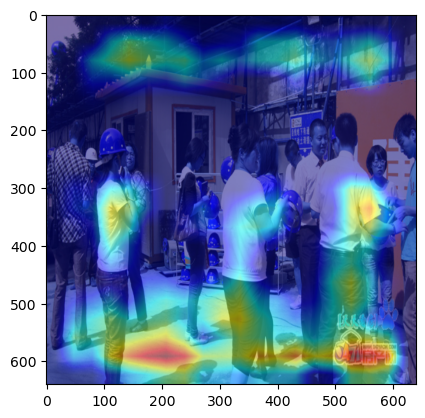

In [23]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

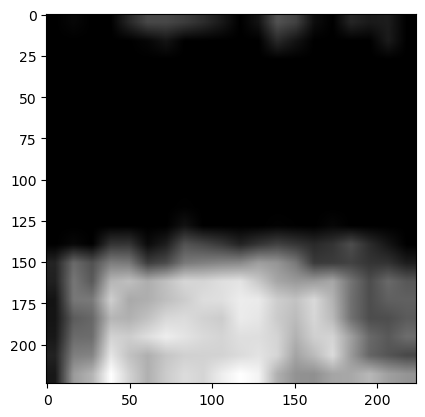

In [9]:
grayscale_ = cv2.resize(np.stack([grayscale_cam] * 3, axis = 2), (224, 224))
plt.imshow(grayscale_, cmap = "gray")
plt.show()

In [19]:
def renormalize_cam_in_bounding_boxes(boxes, colors, names, image_float_np, grayscale_cam):
    """Normalize the CAM to be in the range [0, 1] 
    inside every bounding boxes, and zero outside of the bounding boxes. """
    renormalized_cam = np.zeros(grayscale_cam.shape, dtype=np.float32)
    for x1, y1, x2, y2 in boxes:
        renormalized_cam[y1:y2, x1:x2] = scale_cam_image(grayscale_cam[y1:y2, x1:x2].copy())    
    renormalized_cam = scale_cam_image(renormalized_cam)
    eigencam_image_renormalized = show_cam_on_image(image_float_np, renormalized_cam, use_rgb=True)
    image_with_bounding_boxes = draw_detections(boxes, colors, names, eigencam_image_renormalized)
    return image_with_bounding_boxes


renormalized_cam_image = renormalize_cam_in_bounding_boxes(boxes, colors, names, img, grayscale_cam)
Image.fromarray(renormalized_cam_image)

NameError: name 'boxes' is not defined